In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

In [5]:
bus_station = pd.read_csv('1.1 BUS_STATION_BOARDING_MONTH_202204.csv', sep=",", encoding = "cp949")
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404
...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503


In [6]:
bus_station['자치구'] = bus_station["버스정류장ARS번호"].str.slice(start=0, stop=2)
bus_station['자치구']

0          06
1          06
2          06
3          06
4          11
           ..
1169873    12
1169874    06
1169875    16
1169876    25
1169877    06
Name: 자치구, Length: 1169878, dtype: object

In [7]:
bus_station['자치구'] = bus_station['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})

bus_station['자치구']

0          동대문구
1          동대문구
2          동대문구
3          동대문구
4           노원구
           ... 
1169873     은평구
1169874    동대문구
1169875     강서구
1169876     강동구
1169877    동대문구
Name: 자치구, Length: 1169878, dtype: object

In [8]:
bus_station = bus_station.dropna()
bus_station = bus_station.astype({"버스정류장ARS번호":'int'})
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),6242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),6238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),6309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구
...,...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503,은평구
1169874,20220430,201,201번(구리~서울역),6278,세종대왕기념관,153,43,20220503,동대문구
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503,강서구
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503,강동구


In [9]:
only_seoul = pd.read_csv('1.1 bus_station.csv', sep=",", encoding = "UTF-8")
only_seoul.rename(columns={'ARS-ID':'버스정류장ARS번호'}, inplace=True)
df = pd.merge(only_seoul,bus_station,how='inner', on='버스정류장ARS번호')
df


,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20220401,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리,4,9,20220404,종로구
1,1001,종로2가사거리,20220401,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리,5,6,20220404,종로구
2,1001,종로2가사거리,20220401,741,741번(진관차고지~헌인릉입구),종로2가사거리,206,203,20220404,종로구
3,1001,종로2가사거리,20220401,470,470번(상암차고지~안골마을),종로2가사거리,303,239,20220404,종로구
4,1001,종로2가사거리,20220402,741,741번(진관차고지~헌인릉입구),종로2가사거리,132,159,20220405,종로구
...,...,...,...,...,...,...,...,...,...,...
1060881,25990,암사삼성.현대아파트,20220426,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,89,30,20220429,강동구
1060882,25990,암사삼성.현대아파트,20220427,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,88,40,20220430,강동구
1060883,25990,암사삼성.현대아파트,20220428,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,82,33,20220501,강동구
1060884,25990,암사삼성.현대아파트,20220429,강동02,강동02(가래여울~암사동서원마을),암사삼성.현대아파트,96,37,20220502,강동구


In [10]:
seoul_bus_station_ARS = df.groupby(by=["자치구"], as_index=False)["버스정류장ARS번호"].nunique()

seoul_bus_station_line = df.groupby(by=["자치구"], as_index=False)["노선번호"].nunique()

seoul_bus_station_sum = df.groupby(by=["자치구"], as_index=False)[["승차총승객수","하차총승객수"]].sum()

seoul_bus_station_mean = df.groupby(by=["자치구"], as_index=False)[["승차총승객수","하차총승객수"]].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'}, inplace=True)

In [11]:
a = pd.merge(seoul_bus_station_ARS,seoul_bus_station_line,how='inner', on='자치구')
b = pd.merge(a,seoul_bus_station_sum,how='inner', on='자치구')
seoul_bus_station = pd.merge(b,seoul_bus_station_mean,how='inner', on='자치구')
seoul_bus_station

,자치구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [12]:
seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수','노선번호':'노선수'}, inplace=True)

seoul_bus_station.to_csv("df_seoul_bus_station.csv", index = False)
seoul_bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      25 non-null     object 
 1   정류장수     25 non-null     int64  
 2   노선수      25 non-null     int64  
 3   승차총승객수   25 non-null     int64  
 4   하차총승객수   25 non-null     int64  
 5   승차평균승객수  25 non-null     float64
 6   하차평균승객수  25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.6+ KB


In [13]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')      

target = '자치구'
line = ['정류장수', '노선수']
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수']

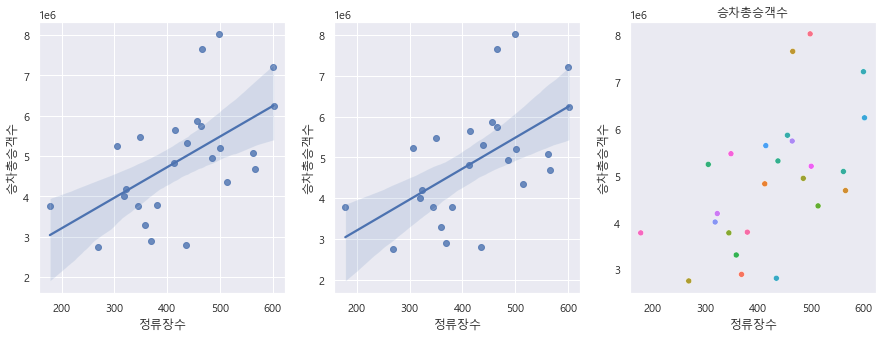

승차총승객수 : (0.5666813370974586, 0.003141977397117319)


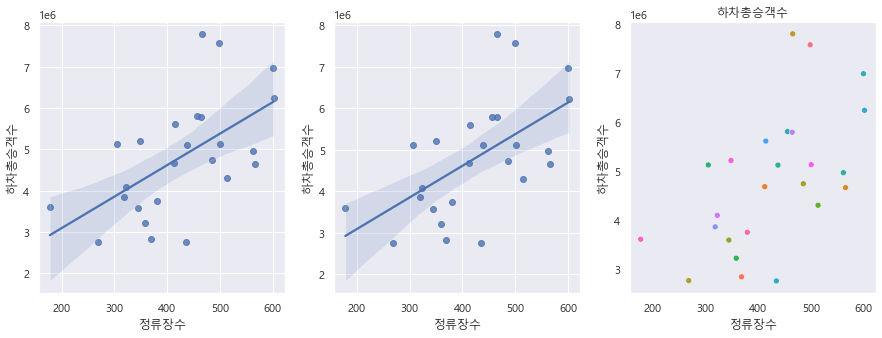

하차총승객수 : (0.5784790149467576, 0.0024518332034538645)


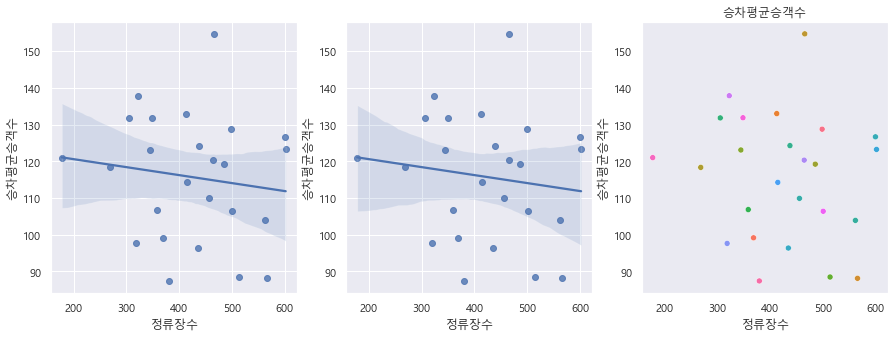

승차평균승객수 : (-0.13531841122802127, 0.5189725687303919)


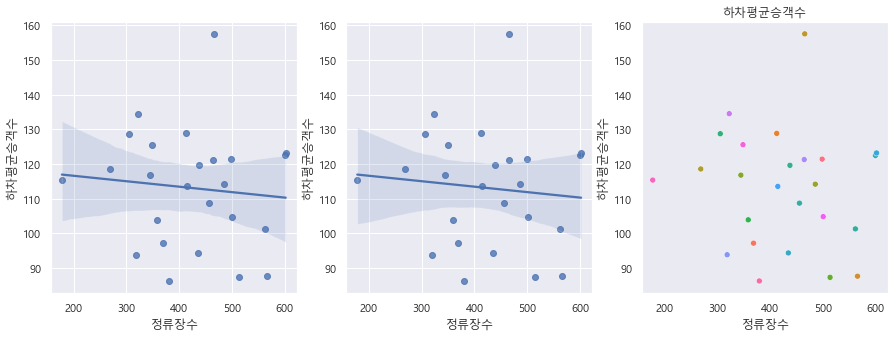

하차평균승객수 : (-0.0991459213474922, 0.637273177989508)


In [14]:
# 정류장 별 승하차
for i in use:
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.regplot(data=seoul_bus_station, x='정류장수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=seoul_bus_station, x='정류장수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=seoul_bus_station, x='정류장수', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()
    result = spst.pearsonr(seoul_bus_station['정류장수'], seoul_bus_station[i])
    print(f'{i} : {result}')

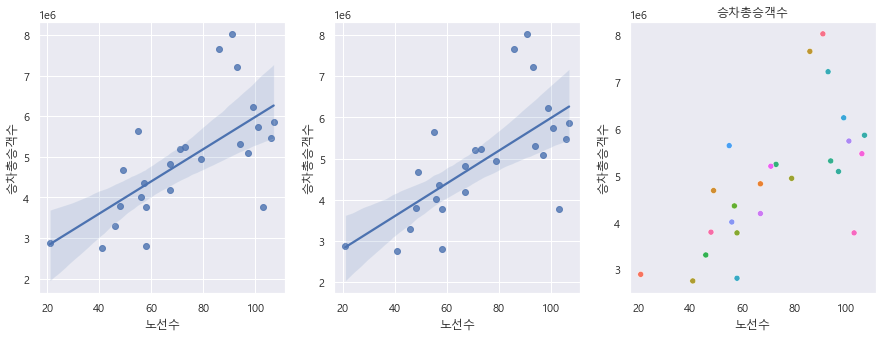

승차총승객수 : (0.6654877832095705, 0.0002830862285771965)


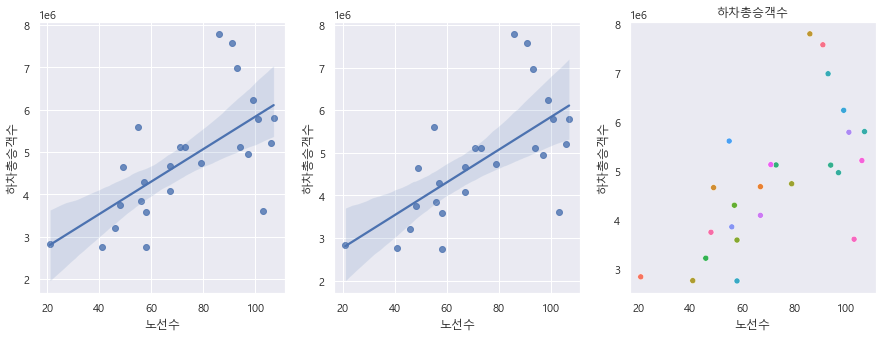

하차총승객수 : (0.6526422720355217, 0.00040610118937178525)


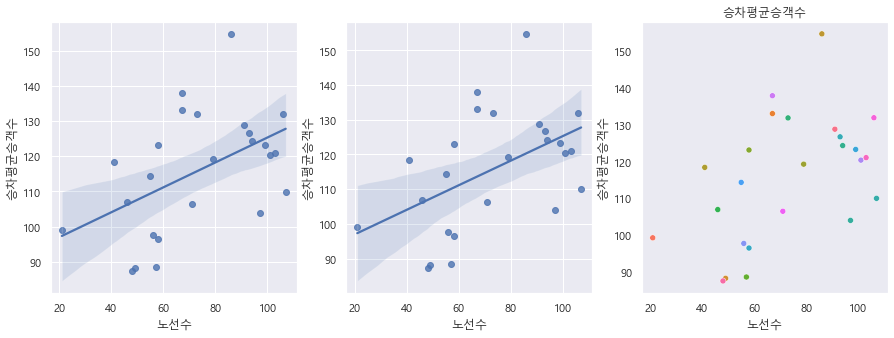

승차평균승객수 : (0.49354079092741227, 0.012170019218131685)


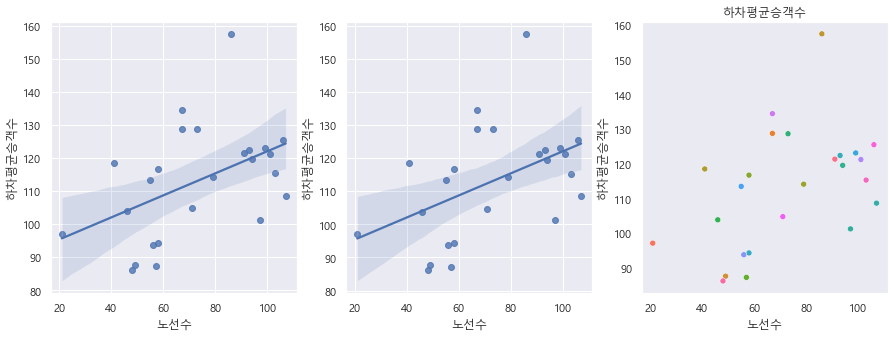

하차평균승객수 : (0.4704401254149343, 0.017632441540646557)


In [15]:
# 노선 별 승하차
for i in use:
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.regplot(data=seoul_bus_station, x='노선수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=seoul_bus_station, x='노선수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=seoul_bus_station, x='노선수', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()
    result = spst.pearsonr(seoul_bus_station['노선수'], seoul_bus_station[i])
    print(f'{i} : {result}')

In [16]:
seoul_bus_station['승차승객/정류장수'] = seoul_bus_station['승차총승객수'] / seoul_bus_station['정류장수']
seoul_bus_station['하차승객/정류장수'] = seoul_bus_station['하차총승객수'] / seoul_bus_station['정류장수']

seoul_bus_station['승차승객/노선수'] = seoul_bus_station['승차총승객수'] / seoul_bus_station['노선수']
seoul_bus_station['하차승객/노선수'] = seoul_bus_station['하차총승객수'] / seoul_bus_station['노선수']

seoul_bus_station[['승차승객/정류장수' , '하차승객/정류장수', '승차승객/노선수' , '하차승객/노선수']].describe()

,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수
count,25.000000,25.000000,25.000000,25.000000
mean,11922.706529,11633.129072,71363.061299,69811.839657
std,3377.156483,3232.972114,20555.684617,20471.192599
min,6453.517241,6314.340230,36666.747573,34941.087379
25%,9980.371053,9734.551440,56830.445545,57259.514851
50%,11683.246973,11311.823245,71592.357143,68770.946429
75%,12972.065015,12712.631579,77648.709677,75310.947368
max,21217.275281,20218.719101,137621.571429,134786.000000


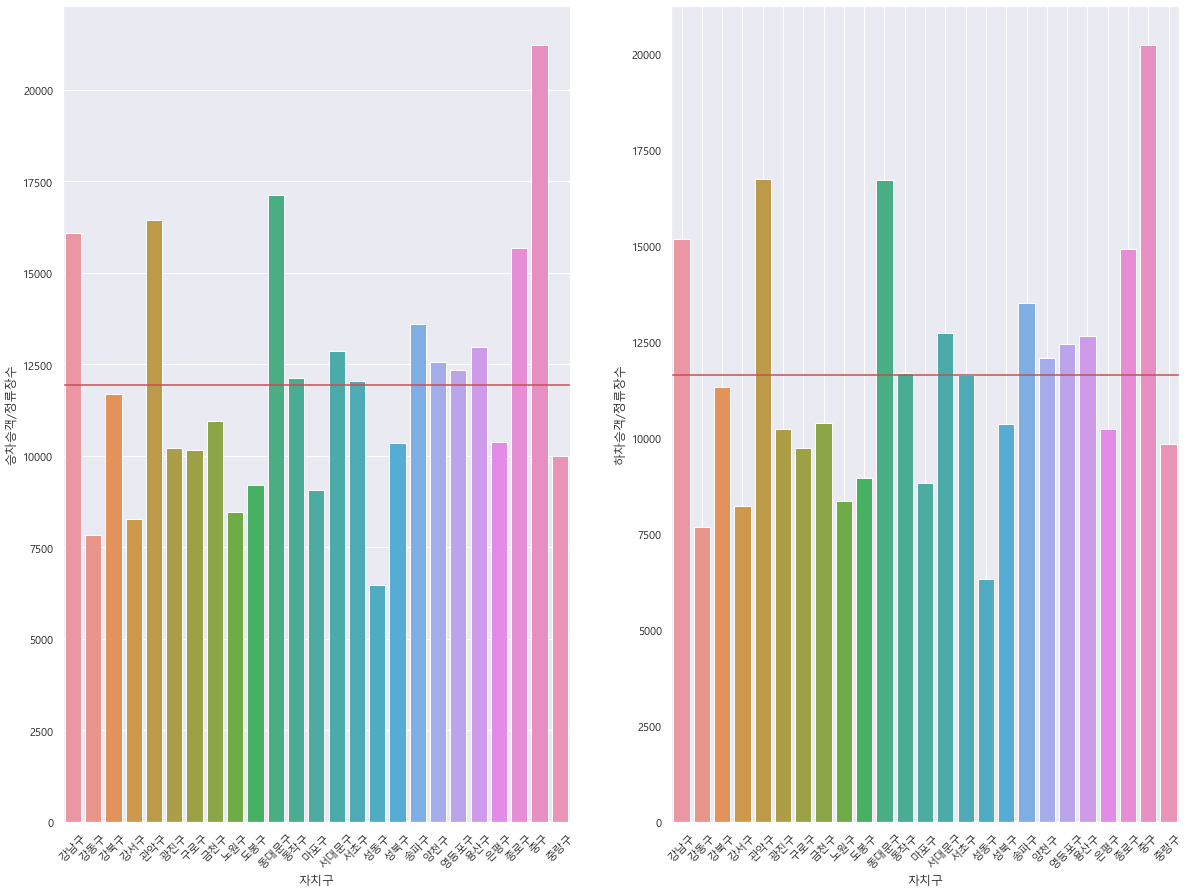

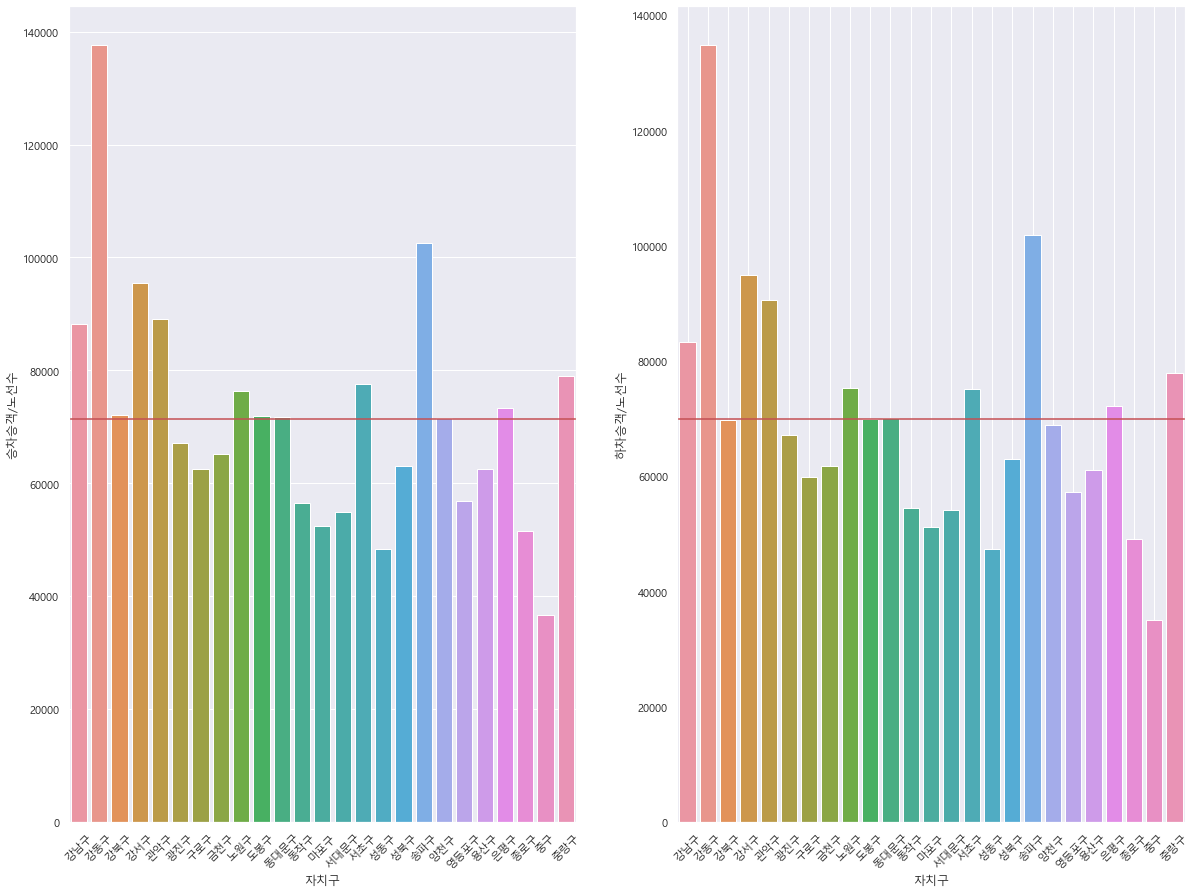

In [17]:
li = [['승차승객/정류장수' , '하차승객/정류장수'], ['승차승객/노선수' , '하차승객/노선수']]
for i in li:
    plt.figure(figsize=(20,15))
    plt.subplot(1,2,1)
    sns.barplot(data=seoul_bus_station, x=target, y = i[0])
    plt.axhline(seoul_bus_station[i[0]].mean(), color='r')
    plt.xticks(rotation=45)
    plt.subplot(1,2,2)
    sns.barplot(data=seoul_bus_station, x=target, y = i[1])
    plt.axhline(seoul_bus_station[i[1]].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [18]:
jong_bus = seoul_bus_station.loc[(seoul_bus_station['승차승객/정류장수'] > seoul_bus_station['승차승객/정류장수'].mean()) 
                          & (seoul_bus_station['하차승객/정류장수'] > seoul_bus_station['하차승객/정류장수'].mean())
                          , ['자치구', '승차승객/정류장수', '하차승객/정류장수']]
jong_bus

,자치구,승차승객/정류장수,하차승객/정류장수
0,강남구,16093.152305,15168.763527
4,관악구,16428.796137,16722.051502
10,동대문구,17126.029412,16716.924837
11,동작구,12133.045662,11671.863014
13,서대문구,12858.550439,12712.631579
17,송파구,13594.559036,13502.380723
18,양천구,12567.937304,12072.642633
19,영등포구,12343.817204,12437.012903
20,용산구,12972.065015,12651.622291
22,종로구,15670.300860,14915.169054


In [19]:
no_bus = seoul_bus_station.loc[(seoul_bus_station['승차승객/노선수'] > seoul_bus_station['승차승객/노선수'].mean()) 
                          & (seoul_bus_station['하차승객/노선수'] > seoul_bus_station['하차승객/노선수'].mean())
                          , ['자치구', '승차승객/노선수', '하차승객/노선수']]
no_bus

,자치구,승차승객/노선수,하차승객/노선수
0,강남구,88247.065934,83178.164835
1,강동구,137621.571429,134786.000000
3,강서구,95532.306122,94955.673469
4,관악구,89021.151163,90610.186047
8,노원구,76373.596491,75310.947368
9,도봉구,71832.717391,69813.500000
10,동대문구,71788.561644,70073.684932
14,서초구,77648.709677,75031.720430
17,송파구,102577.127273,101881.600000
21,은평구,73262.816901,72147.873239


In [20]:
dup_bus = pd.merge(jong_bus, no_bus, how='inner', on='자치구')
dup_bus

,자치구,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수
0,강남구,16093.152305,15168.763527,88247.065934,83178.164835
1,관악구,16428.796137,16722.051502,89021.151163,90610.186047
2,동대문구,17126.029412,16716.924837,71788.561644,70073.684932
3,송파구,13594.559036,13502.380723,102577.127273,101881.600000


In [21]:
tmp_bus = bus_station.loc[bus_station['자치구2'].isin(dup_bus['자치구'])]
tmp_bus_line_count = tmp_bus.groupby(by=['사용일자', '노선번호','자치구2'], as_index=False)['노선번호'].count()
tmp_bus_line_sum = tmp_bus.groupby(by=['노선번호','자치구2'], as_index=False)['승차총승객수', '하차총승객수'].sum()
tmp_bus_line_mean = tmp_bus.groupby(by=['노선번호','자치구2'], as_index=False)['승차총승객수', '하차총승객수'].mean()
tmp_bus_line_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'}, inplace=True)
tmp_bus_line_count.rename(columns={'노선번호':'노선별 수'}, inplace=True)
tmp_bus_line_sum, tmp_bus_line_mean

KeyError: '자치구2'

In [ ]:
tmp_bus_line_sum
tmp_bus_line_mean

tmp_m = pd.merge(tmp_bus_line_sum, tmp_bus_line_mean, on=['노선번호', '자치구2'])
# tmp_bus_m = pd.merge(tmp_m, tmp_bus_line_count)
tmp_m

In [ ]:
li = list(tmp_bus['자치구2'].unique())
tmp_bus.describe()

In [ ]:

for place in li:
    tmp_bus2 = tmp_bus.loc[tmp_bus['자치구2'] == place]
    plt.figure(figsize=(20,8))
    count = 1
    for i in ['승차총승객수', '하차총승객수']:
        plt.subplot(1,2,count)
        sns.histplot(data=tmp_bus2, x=i, bins=5, kde=True)
        plt.axvline(tmp_bus[i].mean(), color='r')
        plt.axvline(tmp_bus2[i].mean(), color='g')
        plt.title(place+' : '+i)
        plt.grid()
        count+=1

    plt.tight_layout()
    plt.show()